# Day 3 

## Plotting data

### 2D Plots

We evaluate and plot

$$ f(x) = \sin( 2 \pi \beta x )$$

in the $x \in [-5, 5]$ range.

In [201]:
x = np.linspace(-5,5,200)

A simple plot for $beta = 1$:

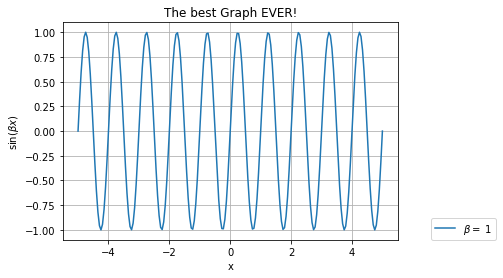

In [204]:
plt.figure()
beta = 1
y = np.sin(beta*x*2*np.pi)
plt.plot(x,y,'-',label=r'$\beta =$ {}'.format(beta))
plt.title("The best Graph EVER!")
plt.grid()
plt.xlabel(r'x') #string! not the variable
plt.ylabel(r'$\sin(\beta x)$')#you can use LaTeX!!!!
plt.legend(frameon=True, loc=(1.1,0))

Same plot but now we produce a file (PNG):

In [ ]:
plt.figure()
beta = 1
y = np.sin(beta*x*2*np.pi)
plt.plot(x,y,'-',label=r'$\beta =$ {}'.format(beta))
plt.title("The best Graph EVER!")
plt.grid()
plt.xlabel(r'x') #string! not the variable
plt.ylabel(r'$\sin(\beta x)$')#you can use LaTeX!!!!
plt.legend(frameon=True, loc=(1.1,0))
plt.savefig("best_ever.png",dpi=400)

Slightly more complicated, a set of plots for $\beta$ values from 1 to 5:

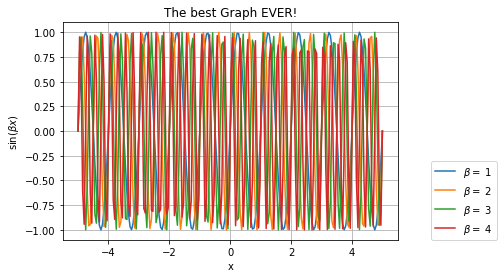

In [205]:
plt.figure()
for beta in range(1,5):
    y = np.sin(beta*x*2*np.pi)
    plt.plot(x,y,'-',label=r'$\beta =$ {}'.format(beta))
plt.title("The best Graph EVER!")
plt.grid()
plt.xlabel(r'x') #string! not the variable
plt.ylabel(r'$\sin(\beta x)$')#you can use LaTeX!!!!
plt.legend(frameon=True, loc=(1.1,0))

Instead of having all plots in one Figure we can have a 2x2 layout...

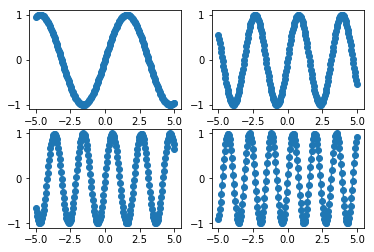

In [206]:
plt.figure(1)
plt.subplot(221) # meaning 2 rows, 2 columns, 1st figure
beta = 1
y = np.sin(beta*x)
plt.plot(x,y,'-o',label=r'$\beta =$ {}'.format(beta))
plt.subplot(222) # meaning 2 rows, 2 columns, 2nd figure
beta = 2
y = np.sin(beta*x)
plt.plot(x,y,'-o',label=r'$\beta =$ {}'.format(beta))
plt.subplot(223)# meaning 2 rows, 2 columns, 3rd figure
beta = 3
y = np.sin(beta*x)
plt.plot(x,y,'-o',label=r'$\beta =$ {}'.format(beta))
plt.subplot(224) # meaning 2 rows, 2 columns, 4th figure
beta = 4
y = np.sin(beta*x)
plt.plot(x,y,'-o',label=r'$\beta =$ {}'.format(beta))

Let's be more systematic...

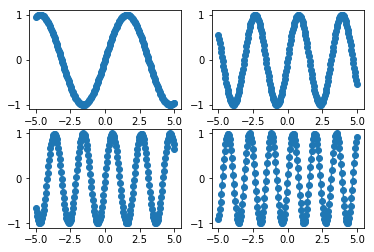

In [208]:
plt.figure(1)
for beta in range(1,5):
    trick_for_position = 220+beta
    plt.subplot(trick_for_position)
    y = np.sin(beta*x)
    plt.plot(x,y,'-o',label=r'$\beta =$ {}'.format(beta))

Use of subplots:

Text(0.5,0,'x')

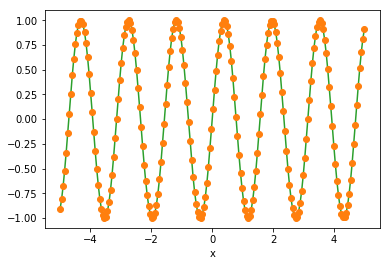

In [209]:
fig, ax = plt.subplots()
plot_lines = ax.plot(x,y,'-',color='C2')
plot_points = ax.plot(x,y,'o',color='C1')
ax.set_xlabel('x')

### Plotting matrices

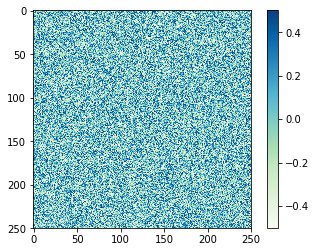

In [106]:
probability = np.random.random((250,250)) - 0.5
plt.imshow(probability, cmap='GnBu')
plt.colorbar()

## Reading and Plotting Data

Using Numpy and Matplotlib

Make sure that you have the correct PATH to the file

In [212]:
filename = "Example_FTIR/Ht0007.CSV"

First solution, using Standard Python. The data consists of two arrays
- separated by semicolon ";"
- decimal separator is ","
We need to **parse the file** line by line

In [218]:
file_in = open(filename) #open the file
freq = [] #create an empty list for frequencies
intensity = [] #create an empty list for intensities
for line in file_in: #scan the lines of the file
    values_as_str=line.split(";") #split the two numbers using the semicolon
    #get the first element, convert to a float BUT FIRST replace de decimal , by a decimal .
    f = float(values_as_str[0].replace(',','.'))
    #add it to the list
    freq.append(f)
    #get the second element, convert to a float BUT FIRST replace de decimal , by a decimal .
    i = float(values_as_str[1].replace(',','.'))
    #add it to the list
    intensity.append(i)
file_in.close()

Plot the data: (keep in mind these are LISTS)

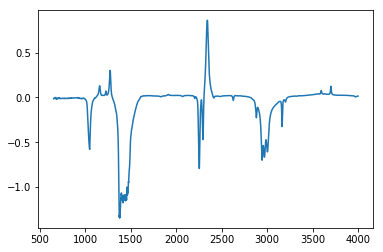

In [217]:
plt.plot(freq,intensity)

The **clever alternative**, use NumPy to directly read the file:

In [219]:
data_set = np.genfromtxt([line.replace(',','.') 
                          for line in open(filename)], delimiter= ';')

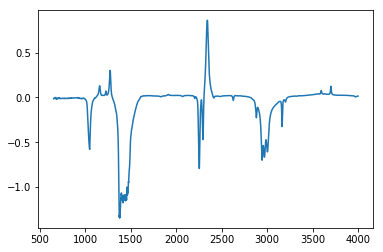

In [220]:
plt.plot(data_set[:,0],data_set[:,1])

Plot all the data in the Directory!

Text(0,0.5,'Absorbance')

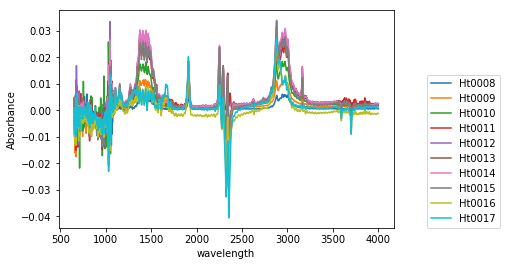

In [148]:
file_list = glob.glob('Example_FTIR/H*.CSV')
file_list.sort()
colors = 
i = 1
for file in file_list:
    data_set = np.genfromtxt([line.replace(',','.') for line in open(file)], 
                             delimiter= ';')
    if i==1:
        data_ref = data_set
        i += 1
        continue
    name = file.split('/')[1]
    name = name.split('.')[0]
    plt.plot(data_set[:,0],data_set[:,1]-data_ref[:,1],label=name)
    i += 1
plt.legend(loc=(1.1, 0))
plt.xlabel('wavelength')
plt.ylabel('Absorbance difference')

A second example, now the data comes in a single file:
- a first lines with 21 wavelength values
- the following lines have 22 values: time and absorbance values corresponding to the wavelength of the first line

Again, first a solution using simple Python

In [163]:
file_in = open('DATA3DABC.txt')
abs_str = file_in.readline()
wl = []
for val in abs_str.split():
    wl.append(float(val))

time = []
absorbance = []    
for line in file_in:
    data_str = line.split()
    time.append(float(data_str[0]))
    absorbance.append([float(x) for x in data_str[1:]])
file_in.close()

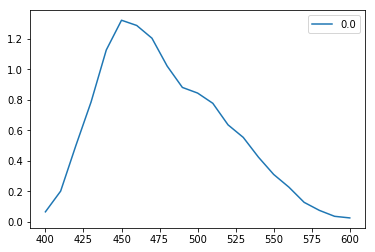

In [169]:
plt.plot(wl,absorbance[0],label=str(time[0]))
plt.legend()

Using NumPy...

In [235]:
wl = np.genfromtxt('DATA3DABC.txt', max_rows=1)
data2 =np.genfromtxt('DATA3DABC.txt', skip_header=1)
time = data2[:,0] #First column is time
absorbances = data2[:,1:] # and the remaining are Absorbance data

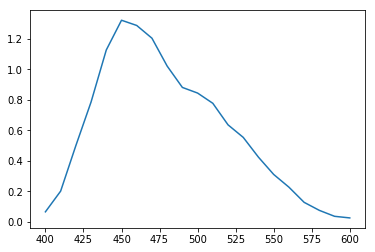

In [231]:
plt.plot(wl,absorbances[0])

Plot all the spectra:

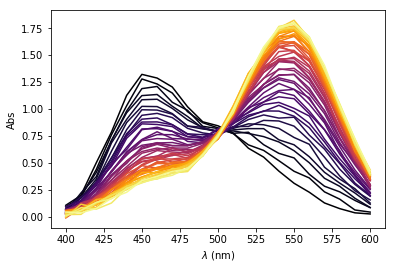

In [234]:
for i in range(len(time)):
    plt.plot(wl,absorbance[i],label=str(time[i]),color=matplotlib.cm.inferno(i/len(absorbance)))
    plt.xlabel(r'$\lambda$ (nm)')
    plt.ylabel('Abs')
#plt.legend()

A three dimensional plot

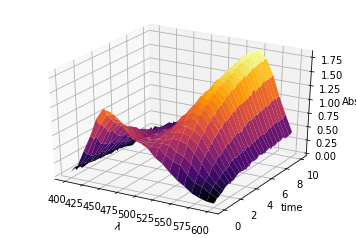

In [194]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(wl,time)
ax.set_ylabel('time')
ax.set_xlabel(r'$\lambda$')
ax.set_zlabel('Abs.')
ax.plot_surface(x,y,absorbance, cmap='inferno')

Practicing with NumPy indexing... How does the absorbance at 560 nm vary with time?

Text(0,0.5,'Abs')

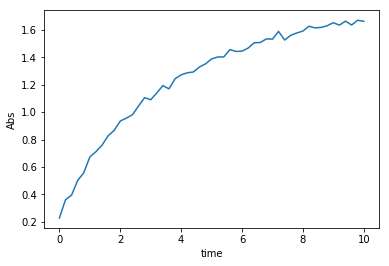

In [236]:
plt.plot(time,absorbance[:,wl==560])
plt.xlabel("time")
plt.ylabel("Abs")